In [15]:
# Step 1: Load the CSV Data into a Pandas DataFrame
file_path = 'KpkCoronaCasesMarch2021.csv'
df = pd.read_csv(file_path)

print(df.head())

   S No      Date  New Cases  Total Cases  New Deaths  Total Deaths  \
0     1  3/1/2021        191        72716           6          2085   
1     2  3/2/2021        186        72801           6          2091   
2     3  3/3/2021        206        73007           5          2096   
3     4  3/4/2021        251        73258           3          2099   
4     5  3/5/2021          5        73515           5          2104   

   New Recovered  Total Recovered  
0             97            68225  
1            282            68507  
2            169            68676  
3            270            68946  
4            160            69106  


In [16]:
# Step 2: Data Cleaning
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)  # Forward fill missing values

print(df.head())

S No               0
Date               0
New Cases          0
Total Cases        0
New Deaths         0
Total Deaths       0
New Recovered      0
Total Recovered    0
dtype: int64
   S No      Date  New Cases  Total Cases  New Deaths  Total Deaths  \
0     1  3/1/2021        191        72716           6          2085   
1     2  3/2/2021        186        72801           6          2091   
2     3  3/3/2021        206        73007           5          2096   
3     4  3/4/2021        251        73258           3          2099   
4     5  3/5/2021          5        73515           5          2104   

   New Recovered  Total Recovered  
0             97            68225  
1            282            68507  
2            169            68676  
3            270            68946  
4            160            69106  


C:\Users\hassa\AppData\Local\Temp\ipykernel_17572\1943134620.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [17]:
# Step 3: Data Analysis
# 1. Summary Statistics:
print(df.describe())

            S No    New Cases    Total Cases  New Deaths  Total Deaths  \
count  31.000000    31.000000      31.000000   31.000000     31.000000   
mean   16.000000   497.516129  100848.225806    9.225806   2189.322581   
std     9.092121   294.542229  125048.507610    5.084025     79.342039   
min     1.000000     5.000000   72716.000000    3.000000   2085.000000   
25%     8.500000   270.500000   74577.500000    6.000000   2120.000000   
50%    16.000000   440.000000   77443.000000    8.000000   2179.000000   
75%    23.500000   683.000000   82232.000000   10.000000   2242.000000   
max    31.000000  1044.000000  774167.000000   23.000000   2363.000000   

       New Recovered  Total Recovered  
count      31.000000        31.000000  
mean      276.193548     71262.161290  
std       167.121596      3072.984001  
min        97.000000     60264.000000  
25%       164.500000     69688.000000  
50%       221.000000     71104.000000  
75%       347.500000     73059.500000  
max       908

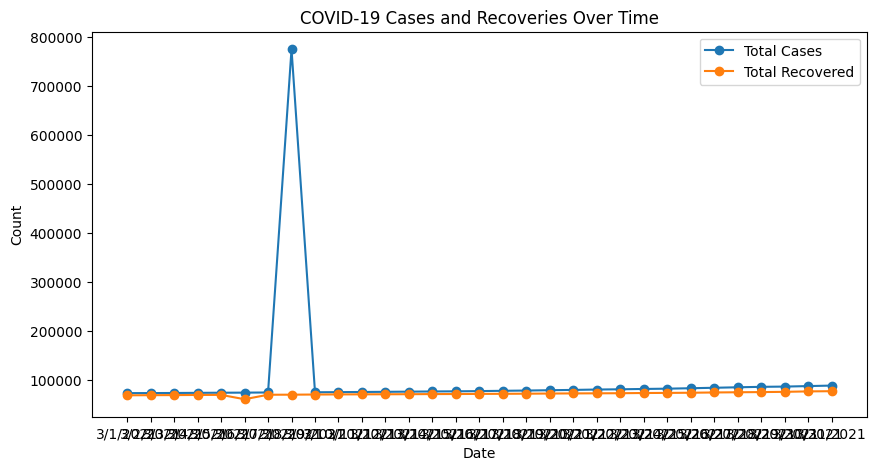

In [18]:
# 2. Visualize the Trends:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total Cases'], marker='o', label='Total Cases')
plt.plot(df['Date'], df['Total Recovered'], marker='o', label='Total Recovered')
plt.title('COVID-19 Cases and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

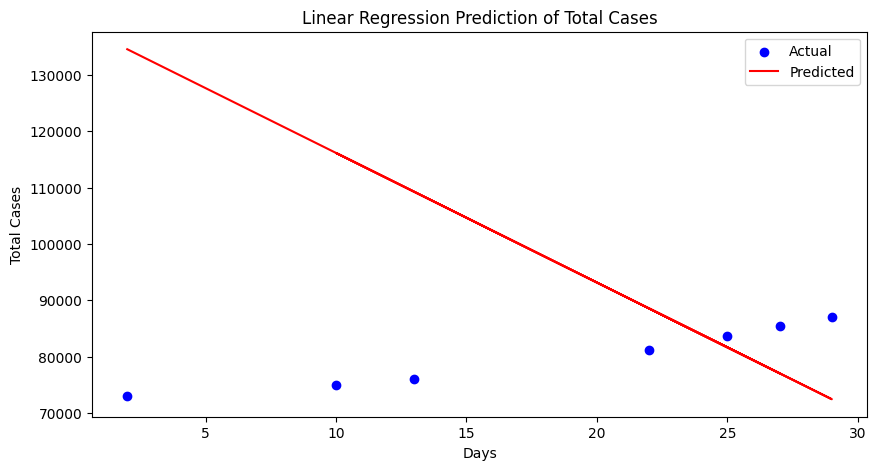

In [19]:
# Step 4: Predictive Modeling (Using Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
df['Days'] = (df['Date'] - df['Date'].min()).dt.days  # Convert date to numerical format

X = df[['Days']]
y = df['Total Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.title('Linear Regression Prediction of Total Cases')
plt.xlabel('Days')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


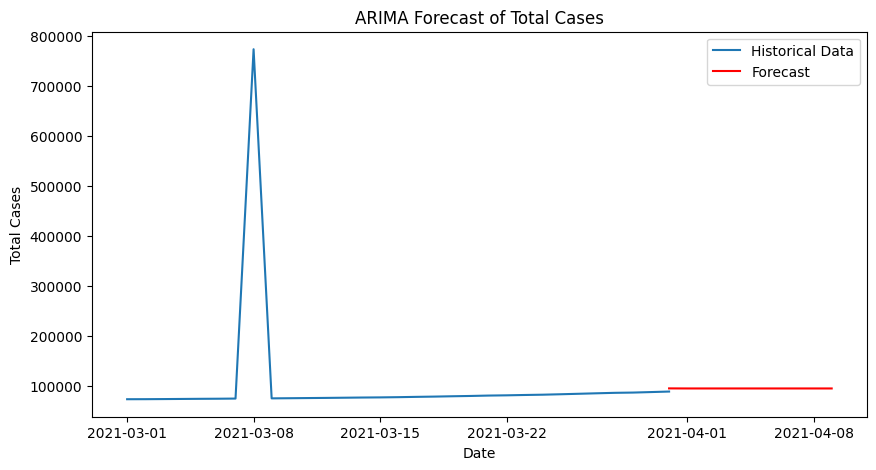

In [20]:
# Step 4: Predictive Modeling (Using Regression)
from statsmodels.tsa.arima.model import ARIMA

# Prepare the time series data
df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Total Cases'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=10)  # Predict the next 10 days

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Total Cases'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


In [22]:
print(df.columns)

Index(['S No', 'New Cases', 'Total Cases', 'New Deaths', 'Total Deaths',
       'New Recovered', 'Total Recovered', 'Days'],
      dtype='object')


C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


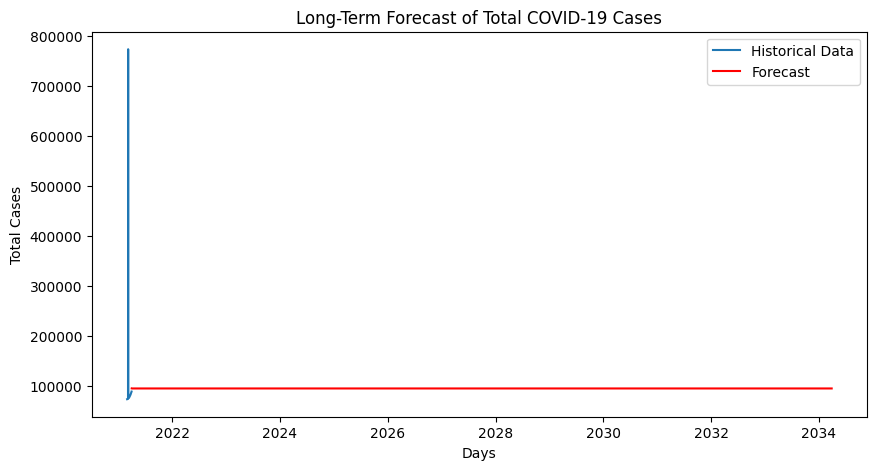

2034-03-19    94287.282969
2034-03-20    94287.282969
2034-03-21    94287.282969
2034-03-22    94287.282969
2034-03-23    94287.282969
2034-03-24    94287.282969
2034-03-25    94287.282969
2034-03-26    94287.282969
2034-03-27    94287.282969
2034-03-28    94287.282969
Freq: D, Name: predicted_mean, dtype: float64


In [23]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'Total Cases' is your target for prediction
model = ARIMA(df['Total Cases'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 4745 days (which is approximately 13 years)
forecast = model_fit.forecast(steps=4745)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Total Cases'], label='Historical Data')
plt.plot(df.index[-1] + pd.to_timedelta(range(1, 4746), unit='D'), forecast, label='Forecast', color='red')
plt.title('Long-Term Forecast of Total COVID-19 Cases')
plt.xlabel('Days')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Print the last 10 days of the forecast for 2034
print(forecast[-10:])
